<h1> Covid-19 missing data from Spanish reports </h1>

During the Covid-19 pandemic, many countries are reporting in different ways the numbers of affected people and deaths they have. This reports are not always made with the same criteria and in some cases this may lead to errors or missing information. The goal of this notebook is to estimate the real number of deaths in Spain between the 01.03.2020 and 30.04.2020 when the Spanish health system was near to collapse with Covid-19 cases.

The analysis is based in two data sets:
<ul>
    <li> OWID - Our World In Data --> https://ourworldindata.org/coronavirus-source-data </li>
    <li> MoMo - Spanish system where the daily deaths are recorded  --> https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html#datos </li>
</ul>

In [1]:
#Import relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print('Modules imported!')

Modules imported!


The first data source is from the Spanish goverment were the daily deaths are recorded and availible in a CSV file with some other related information.

In [2]:
# MoMo -  Import daily mortality in Spain: https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html#datos
morpath ="https://momo.isciii.es/public/momo/data"
df_mor = pd.read_csv(morpath)
df_mor.head()

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-06-23,1064,1064.0,1064.0,989.25,890.6,1135.75
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-06-24,1064,1064.0,1064.0,989.25,896.1,1135.75
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-06-25,1049,1049.0,1049.0,994.00,896.1,1127.35
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-06-26,1095,1095.0,1095.0,994.00,896.1,1129.00
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-06-27,1076,1076.0,1076.0,1001.50,896.1,1131.70


The second source is a data set from Our World in Data webpage.

In [3]:
# OWID - Our World In Data: https://github.com/owid/owid-datasets/tree/master/datasets  / https://ourworldindata.org/coronavirus-source-data
owidpath ="https://covid.ourworldindata.org/data/owid-covid-data.csv"
df_owid = pd.read_csv(owidpath)
df_owid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


First step is to clean the dataframes by selecting only the information for Spain and between the defined period of time.


In [4]:
###Data MoMo###
#leave only the rows between desired period of time
df_mor['fecha_defuncion'] = pd.to_datetime(df_mor['fecha_defuncion'])  
mask = (df_mor['fecha_defuncion'] > '2020-03-01') & (df_mor['fecha_defuncion'] <= '2020-04-30')
df_covid = df_mor.loc[mask]

#Remove rows containing not desired information
df_covid = df_covid[~df_covid.ambito.str.contains("ccaa")]
df_covid = df_covid[~df_covid.cod_sexo.str.contains("1")]
df_covid = df_covid[~df_covid.cod_sexo.str.contains("6")]
df_covid = df_covid[~df_covid.cod_gedad.str.contains("menos_65")]
df_covid = df_covid[~df_covid.cod_gedad.str.contains("65_74")]
df_covid = df_covid[~df_covid.cod_gedad.str.contains("mas_74")]

###Data OWID###
#select data for Spain
df_osp = df_owid.loc[df_owid['location']=='Spain']

#leave only rows in the given period of time
df_osp['date'] = pd.to_datetime(df_osp['date'])  
mask2 = (df_osp['date'] >= '2020-03-01') & (df_osp['date'] <= '2020-04-30')
df_osp = df_osp.loc[mask2]


C:\Users\Luis\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Data visualization:
<ul>
    <li> From MoMo compare the number of estimated deaths and the deaths register in that period of time </li>
</ul>

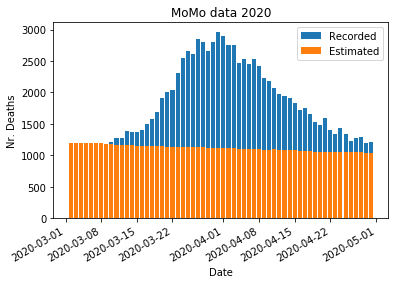

In [5]:
#Recorded vs Estimated deaths in 2020
x=df_covid['fecha_defuncion']
y=df_covid['defunciones_observadas']
z=df_covid['defunciones_esperadas']

fig, ax = plt.subplots()
ax.bar(x, y, label='Recorded')  # Plot some data on the axes.
ax.bar(x, z, label='Estimated')  # Plot more data on the axes...
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Nr. Deaths')  # Add a y-label to the axes.
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
ax.set_title("MoMo data 2020")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

In order to make sure that the number of estimated deaths is trustworthy, we can create the same graph for the same period but for 2019:

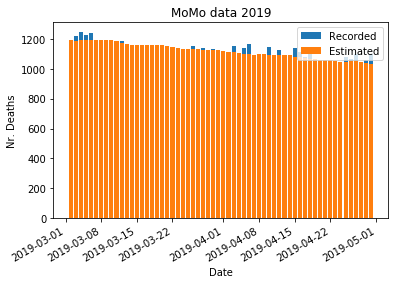

In [6]:
#Recorded vs Estimated deaths in 2019
df_mor['fecha_defuncion'] = pd.to_datetime(df_mor['fecha_defuncion'])  
mask = (df_mor['fecha_defuncion'] > '2019-03-01') & (df_mor['fecha_defuncion'] <= '2019-04-30')
df_covid2019 = df_mor.loc[mask]
df_covid2019 = df_covid2019[~df_covid2019.ambito.str.contains("ccaa")]
df_covid2019 = df_covid2019[~df_covid2019.cod_sexo.str.contains("1")]
df_covid2019 = df_covid2019[~df_covid2019.cod_sexo.str.contains("6")]
df_covid2019 = df_covid2019[~df_covid2019.cod_gedad.str.contains("menos_65")]
df_covid2019 = df_covid2019[~df_covid2019.cod_gedad.str.contains("65_74")]
df_covid2019 = df_covid2019[~df_covid2019.cod_gedad.str.contains("mas_74")]
################################################################################################
x=df_covid2019['fecha_defuncion']
y=df_covid2019['defunciones_observadas']
z=df_covid2019['defunciones_esperadas']

fig, ax = plt.subplots()
ax.bar(x, y, label='Recorded')  # Plot some data on the axes.
ax.bar(x, z, label='Estimated')  # Plot more data on the axes...
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Nr. Deaths')  # Add a y-label to the axes.
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
ax.set_title("MoMo data 2019")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

For better visualization lets compare the diference between the number of recorded and estimated deaths from 2019 and 2020

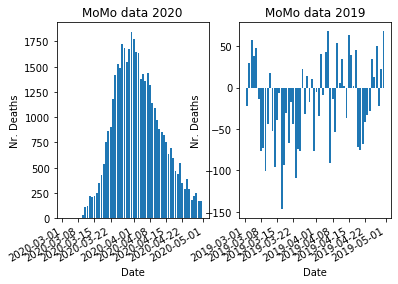

The diference between reported and estimated deaths in March and April 2020 = 42940.5
The diference between reported and estimated deaths in March and April 2019 = -1074.0


In [7]:

df_covid['dif_defunciones'] = df_covid.defunciones_observadas - df_covid.defunciones_esperadas
df_covid2019['dif_defunciones'] = df_covid2019.defunciones_observadas - df_covid2019.defunciones_esperadas
dif2020 = df_covid['dif_defunciones'].sum()
dif2019 = df_covid2019['dif_defunciones'].sum()

df_covid['dif_defunciones'] = df_covid['dif_defunciones'].clip(lower=0)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(df_covid['fecha_defuncion'], df_covid['dif_defunciones'])  # Plot some data on the axes.
ax2.bar(df_covid2019['fecha_defuncion'], df_covid2019['dif_defunciones'])  # Plot more data on the axes...
ax1.set_xlabel('Date')  # Add an x-label to the axes.
ax1.set_ylabel('Nr. Deaths')  # Add a y-label to the axes.
ax1.xaxis_date()     # interpret the x-axis values as dates
ax1.set_title("MoMo data 2020")  # Add a title to the axes.

ax2.set_xlabel('Date')  # Add an x-label to the axes.
ax2.set_ylabel('Nr. Deaths')  # Add a y-label to the axes.
ax2.xaxis_date()     # interpret the x-axis values as dates
ax2.set_title("MoMo data 2019")  # Add a title to the axes.

fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()

print('The diference between reported and estimated deaths in March and April 2020 = {}'.format(dif2020) )
print('The diference between reported and estimated deaths in March and April 2019 = {}'.format(dif2019) )

We can conclude here that the diference of deaths between recorded and estimated in 2020 are caused by Covid-19. For the data from 2020, please note that the Spanish population was in lockdown an no major accident or event could cause near 43000 deaths .

Now lets comare this with the number of deaths reported by the Spanish goverment using the OWID CSV file:

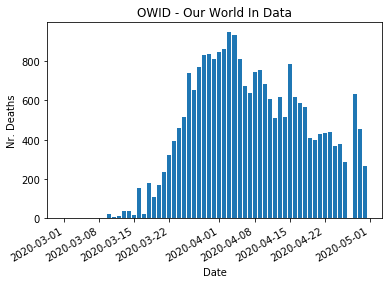

In [8]:
fig, ax = plt.subplots()
ax.bar(df_osp['date'], df_osp.new_deaths)  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Nr. Deaths')  # Add a y-label to the axes.
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
ax.set_title("OWID - Our World In Data")  # Add a title to the axes.
plt.show()

Now we can compare both data sets MoMo vs OWID

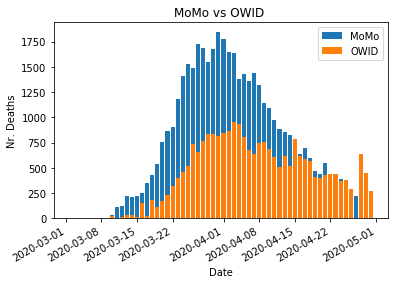

In [9]:
#MoMo vs OWID
df_left =df_covid[['fecha_defuncion','dif_defunciones', 'defunciones_observadas']]
df_right = df_osp[['date', 'new_cases', 'new_deaths']] 
df_merge = df_left.merge(df_right, left_on='fecha_defuncion', right_on='date', how='left')
df_merge.drop(['date', 'defunciones_observadas', 'new_cases'], axis =1, inplace=True)
df_merge.head()
df_merge.shape

x=df_merge['fecha_defuncion']
y=df_merge['dif_defunciones']
z=df_merge['new_deaths']

fig, ax = plt.subplots()
ax.bar(x, y, label='MoMo')  # Plot some data on the axes.
ax.bar(x, z, label='OWID')  # Plot more data on the axes...
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Nr. Deaths')  # Add a y-label to the axes.
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
ax.set_title("MoMo vs OWID ")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

Calculate the diference and totals:

In [10]:
df_merge = df_merge.rename(columns={'fecha_defuncion': 'Date', 'dif_defunciones': 'dif_deaths_momo' , 'new_deaths': 'deaths_owid'})
# Calculate totals
df_merge['no_reported_deaths'] = df_merge['dif_deaths_momo'] - df_merge['deaths_owid']
total = df_merge.sum()

print(total)

dif_deaths_momo       43282.0
deaths_owid           24543.0
no_reported_deaths    18739.0
dtype: float64


Print final dataframe with the no reported deaths data in the las column

In [11]:
print(df_merge)

         Date  dif_deaths_momo  deaths_owid  no_reported_deaths
0  2020-03-02             0.00          0.0                0.00
1  2020-03-03             0.00          0.0                0.00
2  2020-03-04             0.00          0.0                0.00
3  2020-03-05             0.00          1.0               -1.00
4  2020-03-06             0.00          2.0               -2.00
5  2020-03-07             0.00          2.0               -2.00
6  2020-03-08             0.00          0.0                0.00
7  2020-03-09             0.00          0.0                0.00
8  2020-03-10            29.50         23.0                6.50
9  2020-03-11           111.50          7.0              104.50
10 2020-03-12           118.00         12.0              106.00
11 2020-03-13           222.25         37.0              185.25
12 2020-03-14           212.25         37.0              175.25
13 2020-03-15           218.00         15.0              203.00
14 2020-03-16           247.00        15